# Guru example

In [1]:
from modelgym import Guru
import numpy as np

Initialize Guru

In [2]:
guru = Guru()

Make toy dataset

In [3]:
n = 100
np.random.seed(0)
X = np.zeros((n, 6), dtype=object)

# make not numeric feature
X[:, 0] = 'not a number'

# make categorial feature
X[:, 1] = np.random.binomial(3, 0.6, size=n)

# make sparse feature
X[:, 2] = np.random.binomial(1, 0.05, size=n) * np.random.normal(size=n)

# make correlated features
X[:, 3] = np.random.normal(size=n)
X[:, 4] = X[:, 3] * 50 - 100

# make independent feature
X[:, 5] = np.random.normal(size=n)

# make disbalanced classes
y = np.random.binomial(3, 0.9, size=n)

## Main features

Looking for categorical features

In [4]:
guru.check_categorial(X)

Some features are supposed to be categorial. Make sure that all categorial features are in cat_cols.
Following features are not numeric:  [0]
Following features are not variable:  [1]


defaultdict(list, {'not numeric': [0], 'not variable': [1]})

Looking for sparse features

In [5]:
guru.check_sparse(X)

Consider use hashing trick for your sparse features, if you haven't already. Following features are supposed to be sparse:  [2]


[2]

Looking for correlated features

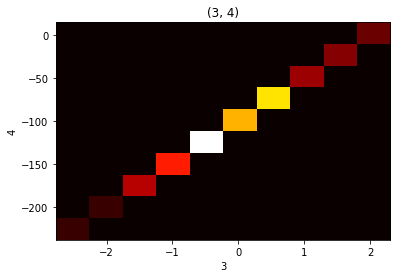

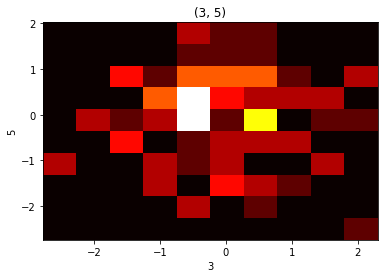

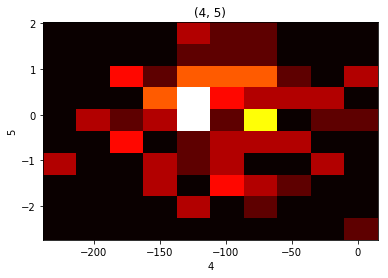

There are several correlated features. Consider dimention reduction, for example you can use PCA. Following pairs of features are supposed to be correlated:  [(3, 4)]


[(3, 4)]

In [6]:
guru.check_correlation(X, [3, 4, 5])

Drawing correlation heatmap for features above

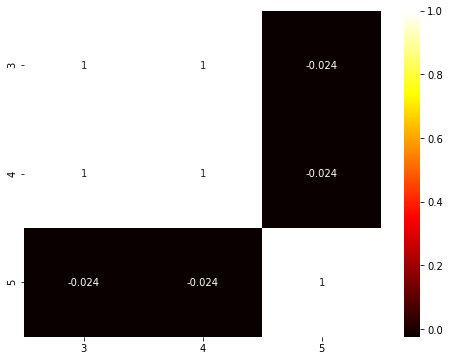

In [7]:
guru.draw_correlation_heatmap(X, [3, 4, 5], figsize=(8, 6))

Looking for disbalanced classes

In [8]:
guru.check_class_disbalance(y)

There is class disbalance. Probably, you can solve it by data augmentation.
Following classes are too common:  [3]
Following classes are too rare:  [1, 0]


defaultdict(list, {'too common': [3], 'too rare': [1, 0]})

## dtype with fields

You can also use array with dtype with fields  
Let's make another representation of the same data

In [9]:
named_X = np.zeros((n,), dtype=[('str', 'U25'),
                                ('categorial', 'int'),
                                ('sparse', float),
                                ('corr_1', float),
                                ('corr_2', float),
                                ('independent', float)])
for i, name in enumerate(named_X.dtype.names):
    named_X[name] = X[:, i]

Now we can draw heatmap like this

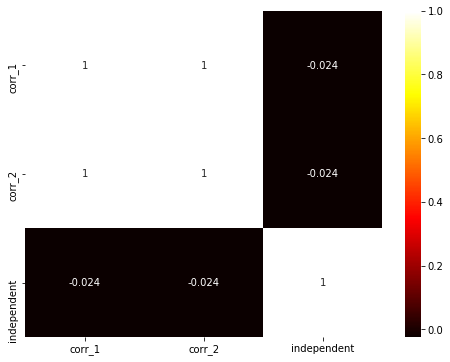

In [10]:
guru.draw_correlation_heatmap(named_X, ['corr_1', 'corr_2', 'independent'], figsize=(8, 6))